<a href="https://colab.research.google.com/github/ybing86-lang/MSSP6070/blob/main/practice_activity7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
uploaded = files.upload()

Saving InternetSales (1).csv to InternetSales (1).csv


In [5]:
df = pd.read_csv("/content/InternetSales (1).csv", encoding='latin-1', dtype={'CustomerAlternateKey': object})
df.head()

/tmp/ipython-input-3863660320.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/InternetSales (1).csv", encoding='latin-1', dtype={'CustomerAlternateKey': object})


,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,5/3/2013,5/15/2013,5/10/2013


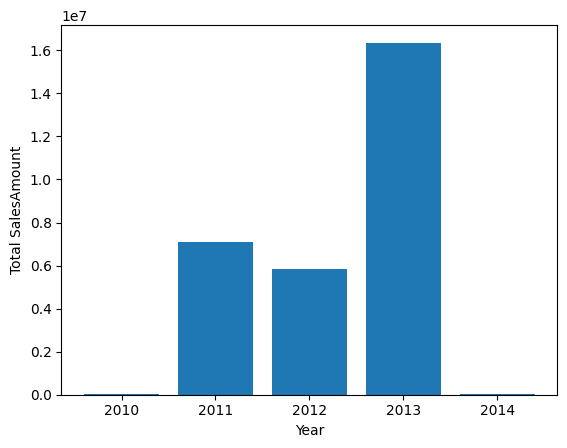

In [8]:
df['SalesAmount'] = pd.to_numeric(df['SalesAmount'], errors='coerce')
df['Year'] = (pd.to_numeric(df['OrderDateKey'], errors='coerce') // 10000)
yearly = df.dropna(subset=['Year','SalesAmount']).groupby('Year', as_index=False)['SalesAmount'].sum()
plt.bar(yearly['Year'], yearly['SalesAmount'])
plt.xlabel('Year')
plt.ylabel('Total SalesAmount')
plt.savefig('/content/yearly_internet_sales.pdf', format='pdf')
plt.show()